In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sc

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

In [4]:
def construct_simplicial_supra(simplicial_complex):
    """
    Input: simplicial complex object
    
    output: networkx graph with higher order simplexes embedded as nodes
    e.g. edges and faces become nodes.
    """
    
    
    # define number of simplices of each order
    n_nodes = simplicial_complex.n_nodes
    n_edges = simplicial_complex.n_edges
    n_faces = simplicial_complex.n_faces
    
    
    
    
    # total nodes in supra
    n_snodes = n_nodes + n_edges + n_faces
    A_supra = sc.sparse.csr_matrix((n_snodes, n_snodes))

    # remove absolute                     
    B0 = simplicial_complex.node_incidence_matrix
    B1 = simplicial_complex.edge_incidence_matrix

    # define adjacency matrices for each order simplex
    A_nodes = B0.T.dot(B0)
    A_nodes.setdiag(0)
    A_nodes = abs(A_nodes)

    A_edges = B0.dot(B0.T)
    A_edges.setdiag(0)
    A_edges = abs(A_edges)

    if B1 is not None:
        A_faces = B1.dot(B1.T)
        A_faces.setdiag(0)
        A_faces = abs(A_faces)
    else: 
        A_faces = None

    # combine into supra adjacency matrix
    if B1 is not None:
        A_supra[:n_nodes,:n_nodes+n_edges] = sc.sparse.hstack([A_nodes,B0.T]).toarray()
        A_supra[n_nodes:n_nodes+n_edges,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([A_edges,B1.T]).toarray()
        A_supra[n_nodes+n_edges:,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([B1,A_faces]).toarray()
    else:
        A_supra[:n_nodes,:] = sc.sparse.hstack([A_nodes,B0.T]).toarray()
        A_supra[n_nodes:,:] = sc.sparse.hstack([B0,A_edges]).toarray()
        
        
    # construct networkx graph
    g = nx.Graph(A_supra)   

    for i in range(len(g)):
        if i < n_nodes:
            g.nodes[i]['node_type'] = 'node'

        if n_nodes <= i < n_nodes+n_edges:
            g.nodes[i]['node_type'] = 'edge'

        if  n_nodes+n_edges <= i :
            g.nodes[i]['node_type'] = 'face'
    
    return g


def plot_supra_embedding(g,pos):
    val_map = {'node': 1.0,
           'edge': 0.5,
           'face': 0.0}

    values = [val_map[g.nodes[node]['node_type']] for node in g.nodes]
    plt.figure()
    nx.draw(g, pos=pos, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')


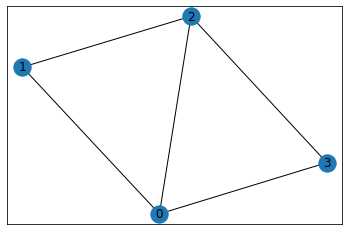

We created 2 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


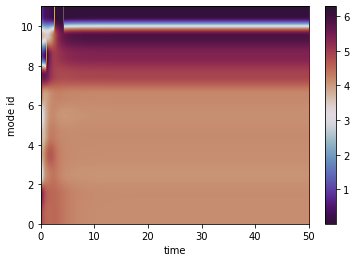

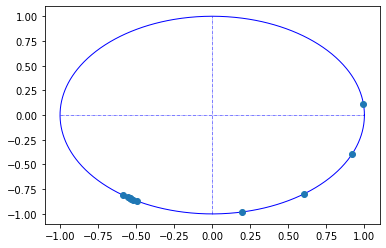

Order parameter :  0.7293672162178256


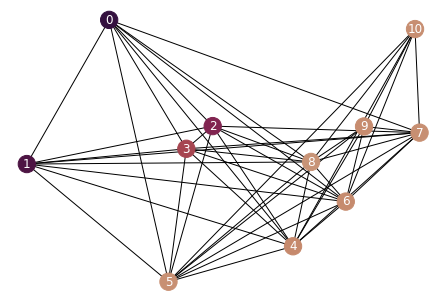

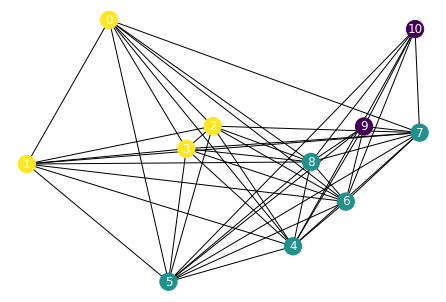

In [5]:
# construct basic cycle simplicial complex with two faces

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()

# construct original simplicial complex
Cff=SimplicialComplex(graph=G)

# create projection onto nodes
g = construct_simplicial_supra(Cff)
pos = nx.spring_layout(g)

# reconstruct simplicial complex only for the integrator
sim_com = SimplicialComplex(graph=g,faces=[],verbose=False)


# set phase
initial_phase=2*np.pi*np.random.rand(sim_com.n_nodes)
t_max = 50
n_t = 200

# integrate node kuramoto
result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)


# plot results
plot_node_kuramoto(result)
plt.show()


plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])

plt.figure()
nx.draw(g, pos=pos, cmap=plt.get_cmap('twilight_shifted'), node_color=result.y[:,-1] , vmin=0, vmax=2*np.pi, with_labels=True, font_color='white')

plot_supra_embedding(g,pos)


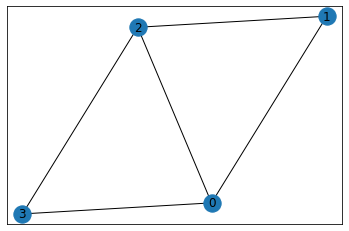

We created 1 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


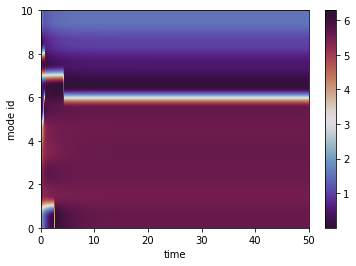

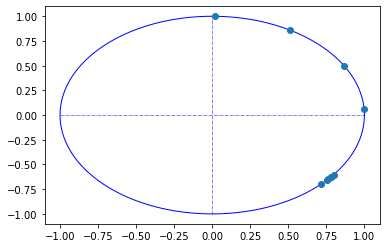

Order parameter :  0.7129929708341419


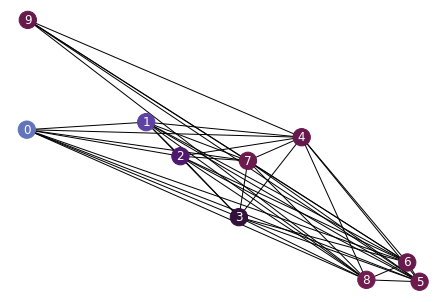

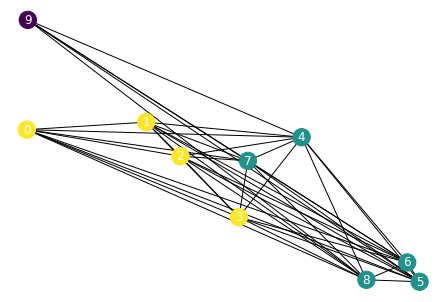

In [6]:

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()
Cfe=SimplicialComplex(graph=G,faces=[(0,1,2)]) # full empty triangles

# create projection onto nodes
g = construct_simplicial_supra(Cfe)
pos = nx.spring_layout(g)

# reconstruct simplicial complex only for the integrator
sim_com = SimplicialComplex(graph=g,faces=[],verbose=False)


# set phase
initial_phase=2*np.pi*np.random.rand(sim_com.n_nodes)
t_max = 50
n_t = 200

# integrate node kuramoto
result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)


# plot results
plot_node_kuramoto(result)
plt.show()


plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])

plt.figure()
nx.draw(g, pos=pos, cmap=plt.get_cmap('twilight_shifted'), node_color=result.y[:,-1] , vmin=0, vmax=2*np.pi, with_labels=True, font_color='white')

plot_supra_embedding(g,pos)


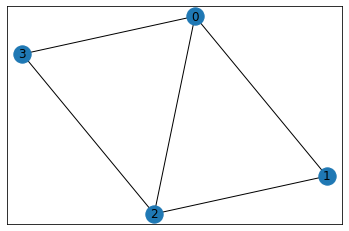

We created 0 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


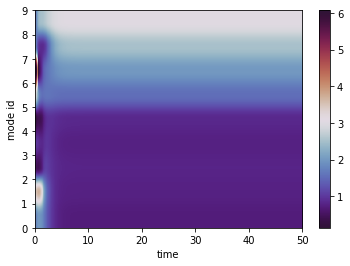

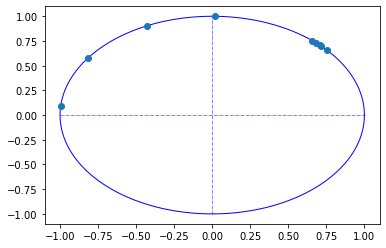

Order parameter :  0.6950283640593468


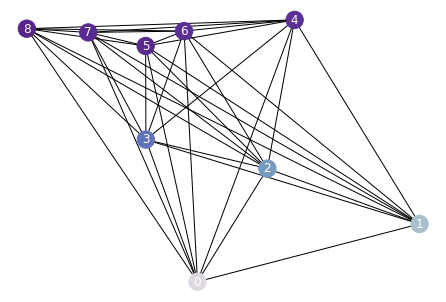

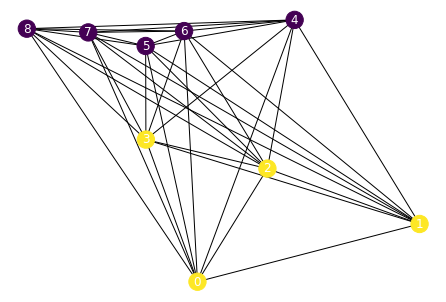

In [7]:

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()
Cee=SimplicialComplex(graph=G,faces=None,no_faces=True) # full empty triangles

# create projection onto nodes
g = construct_simplicial_supra(Cee)
pos = nx.spring_layout(g)

# reconstruct simplicial complex only for the integrator
sim_com = SimplicialComplex(graph=g,faces=[],verbose=False)


# set phase
initial_phase=2*np.pi*np.random.rand(sim_com.n_nodes)
t_max = 50
n_t = 200

# integrate node kuramoto
result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)


# plot results
plot_node_kuramoto(result)
plt.show()


plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])

plt.figure()
nx.draw(g, pos=pos, cmap=plt.get_cmap('twilight_shifted'), node_color=result.y[:,-1] , vmin=0, vmax=2*np.pi, with_labels=True, font_color='white')

plot_supra_embedding(g,pos)
